In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
fname='/content/drive/MyDrive/dataset_EEG/*.edf'

In [ ]:
!pip install mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 24.3 MB/s eta 0:00:00


In [ ]:
from glob import glob
import os
import mne
import numpy as np
import pandas
import matplotlib.pyplot as plt

In [ ]:
glob('/gdrive/MyDrive/dataset_EEG/*.edf')

['/gdrive/MyDrive/dataset_EEG/h01.edf',
 '/gdrive/MyDrive/dataset_EEG/h02.edf',
 '/gdrive/MyDrive/dataset_EEG/h03.edf',
 '/gdrive/MyDrive/dataset_EEG/h04.edf',
 '/gdrive/MyDrive/dataset_EEG/h06.edf',
 '/gdrive/MyDrive/dataset_EEG/h07.edf',
 '/gdrive/MyDrive/dataset_EEG/h05.edf',
 '/gdrive/MyDrive/dataset_EEG/h08.edf',
 '/gdrive/MyDrive/dataset_EEG/h09.edf',
 '/gdrive/MyDrive/dataset_EEG/h10.edf',
 '/gdrive/MyDrive/dataset_EEG/h11.edf',
 '/gdrive/MyDrive/dataset_EEG/h12.edf',
 '/gdrive/MyDrive/dataset_EEG/h13.edf',
 '/gdrive/MyDrive/dataset_EEG/h14.edf',
 '/gdrive/MyDrive/dataset_EEG/s01.edf',
 '/gdrive/MyDrive/dataset_EEG/s08.edf',
 '/gdrive/MyDrive/dataset_EEG/s05.edf',
 '/gdrive/MyDrive/dataset_EEG/s03.edf',
 '/gdrive/MyDrive/dataset_EEG/s02.edf',
 '/gdrive/MyDrive/dataset_EEG/s04.edf',
 '/gdrive/MyDrive/dataset_EEG/s06.edf',
 '/gdrive/MyDrive/dataset_EEG/s10.edf',
 '/gdrive/MyDrive/dataset_EEG/s09.edf',
 '/gdrive/MyDrive/dataset_EEG/s07.edf',
 '/gdrive/MyDrive/dataset_EEG/s12.edf',


In [ ]:
all_file_path=glob('/gdrive/MyDrive/dataset_EEG/*.edf')
print(len(all_file_path))

28


In [ ]:
all_file_path[0].split('/')

['', 'gdrive', 'MyDrive', 'dataset_EEG', 'h01.edf']

In [ ]:
all_file_path[0].split('/')[4]

'h01.edf'

In [ ]:
healthy_file_path=[i for i in all_file_path if 'h' in i.split('/')[4]]
patient_file_path=[i for i in all_file_path if 's' in i.split('/')[4]]

In [ ]:
healthy_file_path

['/gdrive/MyDrive/dataset_EEG/h01.edf',
 '/gdrive/MyDrive/dataset_EEG/h02.edf',
 '/gdrive/MyDrive/dataset_EEG/h03.edf',
 '/gdrive/MyDrive/dataset_EEG/h04.edf',
 '/gdrive/MyDrive/dataset_EEG/h06.edf',
 '/gdrive/MyDrive/dataset_EEG/h07.edf',
 '/gdrive/MyDrive/dataset_EEG/h05.edf',
 '/gdrive/MyDrive/dataset_EEG/h08.edf',
 '/gdrive/MyDrive/dataset_EEG/h09.edf',
 '/gdrive/MyDrive/dataset_EEG/h10.edf',
 '/gdrive/MyDrive/dataset_EEG/h11.edf',
 '/gdrive/MyDrive/dataset_EEG/h12.edf',
 '/gdrive/MyDrive/dataset_EEG/h13.edf',
 '/gdrive/MyDrive/dataset_EEG/h14.edf']

In [ ]:
patient_file_path

['/gdrive/MyDrive/dataset_EEG/s01.edf',
 '/gdrive/MyDrive/dataset_EEG/s08.edf',
 '/gdrive/MyDrive/dataset_EEG/s05.edf',
 '/gdrive/MyDrive/dataset_EEG/s03.edf',
 '/gdrive/MyDrive/dataset_EEG/s02.edf',
 '/gdrive/MyDrive/dataset_EEG/s04.edf',
 '/gdrive/MyDrive/dataset_EEG/s06.edf',
 '/gdrive/MyDrive/dataset_EEG/s10.edf',
 '/gdrive/MyDrive/dataset_EEG/s09.edf',
 '/gdrive/MyDrive/dataset_EEG/s07.edf',
 '/gdrive/MyDrive/dataset_EEG/s12.edf',
 '/gdrive/MyDrive/dataset_EEG/s13.edf',
 '/gdrive/MyDrive/dataset_EEG/s11.edf',
 '/gdrive/MyDrive/dataset_EEG/s14.edf']

In [ ]:
def read_data(file_path):
  data=mne.io.read_raw_edf(file_path,preload=True)
  data.set_eeg_reference() #auto referencing with one electrode
  data.filter(l_freq=0.5,h_freq=45) # bandpass filter of 0.5Hz to 45Hz
  epochs=mne.make_fixed_length_epochs(data,duration=5,overlap=1)
  array=epochs.get_data()
  return array

In [ ]:
sample_data = read_data(healthy_file_path[0])

Extracting EDF parameters from /gdrive/MyDrive/dataset_EEG/h01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 231249  =      0.000 ...   924.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 s)

Not setting metadata
231 matching events found
No baseline correction applied
0 projection items activated
Using da

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


In [ ]:
%%capture
control_epochs_array=[read_data(i) for i in healthy_file_path]
patient_epochs_array=[read_data(i) for i in patient_file_path]

In [ ]:
#control_epochs_array is the 14 arrays of 231 epoch with 19 channel and 1250 ms length signal
#patients_epochs_array is the 14 arrays of 231 epoch with 19 channel and 1250 ms length signal

control_epochs_array[0].shape,patient_epochs_array[0].shape

((231, 19, 1250), (211, 19, 1250))

In [ ]:
# label the signals
# for control epochs label will be 0
# for patient epochs label with be 1

control_epochs_label = [len(i)*[0] for i in control_epochs_array]
patient_epochs_label = [len(i)*[1] for i in patient_epochs_array]

#create 14 list of 231 0s list for healthy signal
#create 14 list of 231 1s list for patient signal

len(control_epochs_label),len(patient_epochs_label)

(14, 14)

In [ ]:
control_epochs_label
len(patient_epochs_label[0])

211

In [ ]:
len(control_epochs_label[0])


231

In [ ]:
data_list = control_epochs_array + patient_epochs_array
label_list = control_epochs_label + patient_epochs_label

In [ ]:
enumerate(data_list)

In [ ]:
#example of enumerate
l1 = ["eat", "sleep", "repeat"]
s1 = "geek"

# creating enumerate objects
obj1 = enumerate(l1)
obj2 = enumerate(s1)

print ("Return type:", type(obj1))
print (list(enumerate(l1)))

# changing start index to 2 from 0
print (list(enumerate(s1, 2)))

Return type: <class 'enumerate'>
[(0, 'eat'), (1, 'sleep'), (2, 'repeat')]
[(2, 'g'), (3, 'e'), (4, 'e'), (5, 'k')]


In [ ]:
group_list = [ [i]*len(j) for i,j in enumerate(data_list)]
len(group_list)

28

In [ ]:
len(group_list[0])

231

In [ ]:
#converting list to array
epochs_array = np.vstack(data_list)
epochs_label_array= np.hstack(label_list)
group_array=np.hstack(group_list)

print(epochs_array.shape, epochs_label_array.shape,group_array.shape)

(7201, 19, 1250) (7201,) (7201,)


In [ ]:
epochs_array=np.moveaxis(epochs_array,1,2)
epochs_array.shape

(7201, 1250, 19)

In [ ]:
#sequential API to create models
from keras.models import Sequential

#Component to create a model
from keras.layers import Dense, Input, Conv1D, MaxPool1D, Dropout, AveragePooling1D, GlobalAveragePooling1D

from keras.layers import LeakyReLU

#Stochastic Gradient Desent Algorithm
from keras.optimizers import SGD

#An keras utility to visualize model graph
from keras.utils import plot_model

from keras.backend import clear_session

#Another ML library that has many utilities for image operation
import skimage

from skimage.io import imshow
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
from tensorflow.keras.layers import Conv1D,BatchNormalization,LeakyReLU,MaxPool1D,GlobalAveragePooling1D,Dense,Dropout,AveragePooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.backend import clear_session



In [ ]:
def cnnmodel():
  clear_session()
  model=Sequential()
  model.add(Conv1D(filters=5,kernel_size=3,strides=1,input_shape=(1250,19)))#1
  model.add(BatchNormalization())
  model.add(LeakyReLU())
  model.add(MaxPool1D(pool_size=2,strides=2))#2
  model.add(Conv1D(filters=5,kernel_size=3,strides=1))#3
  model.add(LeakyReLU())
  model.add(MaxPool1D(pool_size=2,strides=2))#4
  model.add(Dropout(0.5))
  model.add(Conv1D(filters=5,kernel_size=3,strides=1))#5
  model.add(LeakyReLU())
  model.add(AveragePooling1D(pool_size=2,strides=2))#6
  model.add(Dropout(0.5))
  model.add(Conv1D(filters=5,kernel_size=3,strides=1))#7
  model.add(LeakyReLU())
  model.add(AveragePooling1D(pool_size=2,strides=2))#8
  model.add(Conv1D(filters=5,kernel_size=3,strides=1))#9
  model.add(LeakyReLU())
  model.add(GlobalAveragePooling1D())#10
  model.add(Dense(1,activation='sigmoid'))#11

  model.compile('adam',loss='binary_crossentropy',metrics=['accuracy'])
  return model


model=cnnmodel()
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1248, 5)           290       
                                                                 
 batch_normalization (Batch  (None, 1248, 5)           20        
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 1248, 5)           0         
                                                                 
 max_pooling1d (MaxPooling1  (None, 624, 5)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 622, 5)            80        
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 622, 5)            0

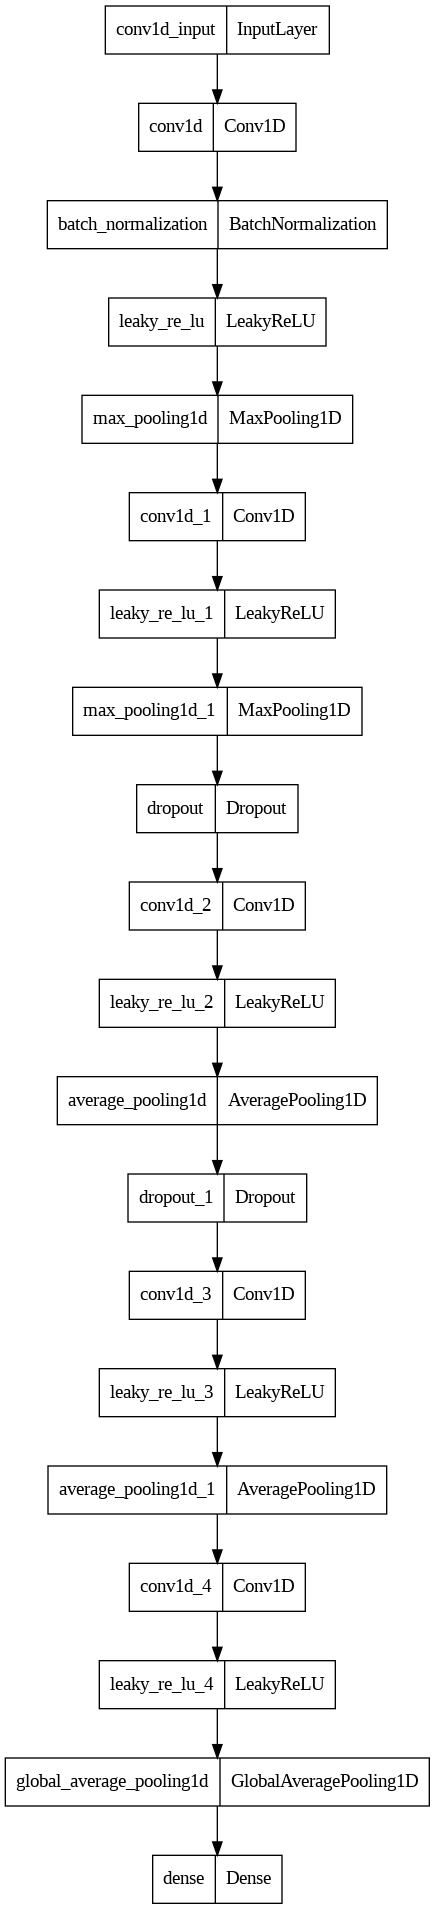

In [ ]:
plot_model(model)

In [ ]:
from sklearn.model_selection import GroupKFold, LeaveOneGroupOut
from sklearn.preprocessing import StandardScaler
gkf=GroupKFold()

In [ ]:
accuracy=[]
for train_index,val_index in gkf.split(epochs_array,epochs_label_array,groups=group_array):
  train_features,train_labels=epochs_array[train_index],epochs_label_array[train_index]
  val_features,val_labels=epochs_array[val_index],epochs_label_array[val_index]
  scaler=StandardScaler()
  train_features= scaler.fit_transform(train_features.reshape(-1,train_features.shape[-1])).reshape(train_features.shape)
  val_features = scaler.fit_transform(val_features.reshape(-1,val_features.shape[-1])).reshape(val_features.shape)
  model=cnnmodel()
  model.fit(train_features,train_labels,epochs=10,batch_size=128,validation_data=(val_features,val_labels))
  accuracy.append(model.evaluate(val_features,val_labels)[1])

Epoch 1/10
45/45 [==============================] - 16s 75ms/step - loss: 0.6819 - accuracy: 0.5670 - val_loss: 0.7276 - val_accuracy: 0.3720
Epoch 2/10
45/45 [==============================] - 1s 23ms/step - loss: 0.6555 - accuracy: 0.5940 - val_loss: 0.6888 - val_accuracy: 0.3782
Epoch 3/10
45/45 [==============================] - 1s 21ms/step - loss: 0.5885 - accuracy: 0.6764 - val_loss: 0.5177 - val_accuracy: 0.8566
Epoch 4/10
45/45 [==============================] - 1s 25ms/step - loss: 0.4787 - accuracy: 0.7839 - val_loss: 0.4318 - val_accuracy: 0.8408
Epoch 5/10
45/45 [==============================] - 2s 34ms/step - loss: 0.4178 - accuracy: 0.8125 - val_loss: 0.3967 - val_accuracy: 0.8620
Epoch 6/10
45/45 [==============================] - 2s 34ms/step - loss: 0.3926 - accuracy: 0.8369 - val_loss: 0.3917 - val_accuracy: 0.8586
Epoch 7/10
45/45 [==============================] - 1s 27ms/step - loss: 0.3600 - accuracy: 0.8553 - val_loss: 0.3851 - val_accuracy: 0.8703
Epoch 8/10
4

In [ ]:
np.mean(accuracy)*100

69.50688362121582